In [2]:
#필요한 라이브러리
import pandas as pd
import numpy as np
import seaborn as sns

In [17]:
brand_df = pd.read_csv(r"C:\Users\user\OneDrive\문서\과제\2024-2\아이펠\brand.csv")
cars_df = pd.read_csv(r"C:\Users\user\OneDrive\문서\과제\2024-2\아이펠\cars.csv")

In [18]:
brand_df.describe()

,title,country
count,48,48
unique,48,12
top,skoda,Japan
freq,1,11


In [19]:
cars_df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3687.000000,3.687000e+03,3687.000000,2276.000000,3662.000000,3652.000000
mean,5787.301058,8.132854e+04,2011.846216,2.807557,4.321409,4.900329
std,4480.629885,3.941718e+04,5.082387,1.546028,0.986760,0.577046
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.500000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,5.000000,7.000000


In [20]:
#cars 데이터를 중심으로 left 병합
merged_df = pd.merge(cars_df, brand_df, on='title', how='left')

In [21]:
merged_df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3687.000000,3.687000e+03,3687.000000,2276.000000,3662.000000,3652.000000
mean,5787.301058,8.132854e+04,2011.846216,2.807557,4.321409,4.900329
std,4480.629885,3.941718e+04,5.082387,1.546028,0.986760,0.577046
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.500000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,5.000000,7.000000


카테고리형 변수를 숫자형태로 변환

In [22]:
from sklearn.preprocessing import LabelEncoder

# 변환할 열들을 리스트로 지정
categorical_columns = ['Engine', 'Emission Class']

# 각 열에 대해 Label Encoding 적용
label_encoder = LabelEncoder()
for column in categorical_columns:
    merged_df[column] = label_encoder.fit_transform(merged_df[column].astype(str))

# 변환된 데이터 확인
merged_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,6,Manual,5.0,5.0,5,NaN,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,4,Manual,3.0,5.0,3,Full,NaN
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,6,Manual,5.0,5.0,4,NaN,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,6,Manual,3.0,4.0,3,Full,NaN
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,5,Manual,5.0,5.0,4,NaN,NaN


In [23]:
# Service history 변수의 결측치를 'Unknown'으로 채움
merged_df['Service history'].fillna('Unknown', inplace=True)

# 결측치가 일정 개수 이상 포함된 행을 제거 (예: 결측치가 3개 이상인 행 제거)
threshold = 3
cleaned_df = merged_df.dropna(thresh=merged_df.shape[1] - threshold)

# 결측치 처리 결과 확인
cleaned_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,6,Manual,5.0,5.0,5,Unknown,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,4,Manual,3.0,5.0,3,Full,NaN
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,6,Manual,5.0,5.0,4,Unknown,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,6,Manual,3.0,4.0,3,Full,NaN
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,5,Manual,5.0,5.0,4,Unknown,NaN


In [24]:
# 각 열의 결측값 개수 확인
missing_values = cleaned_df.isnull().sum()

# 결측값 개수가 0보다 큰 열만 필터링하여 출력
missing_values[missing_values > 0]


Previous Owners    1407
Doors                21
Seats                31
country            3683
dtype: int64

In [25]:
# 수치형 열 선택
numeric_columns = cleaned_df.select_dtypes(include=['float64', 'int64']).columns

# 수치형 변수의 결측치를 각 열의 평균값으로 채움
cleaned_df[numeric_columns] = cleaned_df[numeric_columns].fillna(cleaned_df[numeric_columns].mean())

C:\Users\user\AppData\Local\Temp\ipykernel_11136\1073519633.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[numeric_columns] = cleaned_df[numeric_columns].fillna(cleaned_df[numeric_columns].mean())


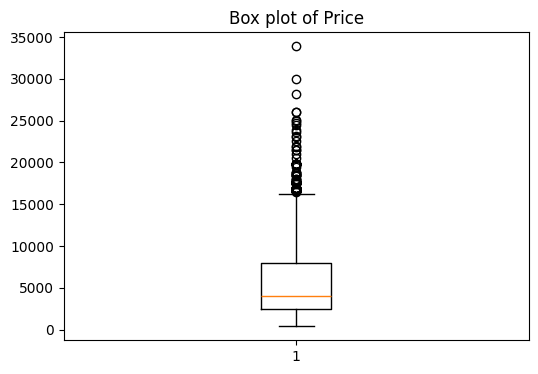

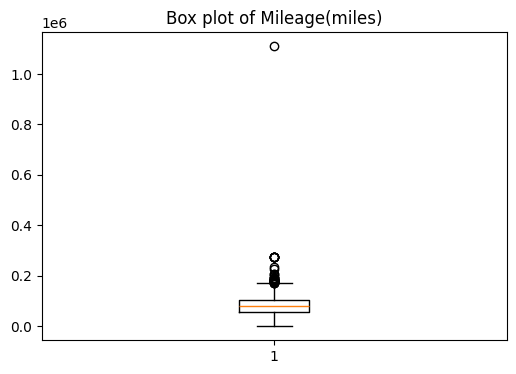

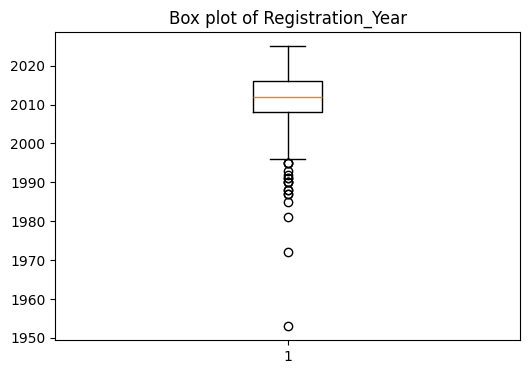

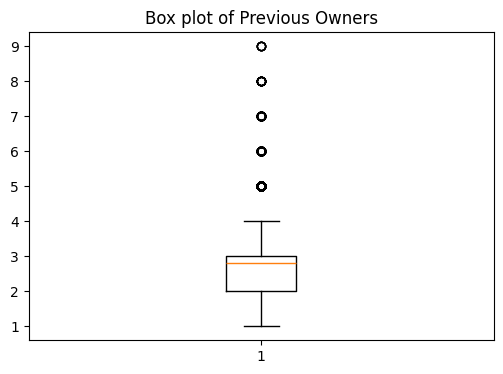

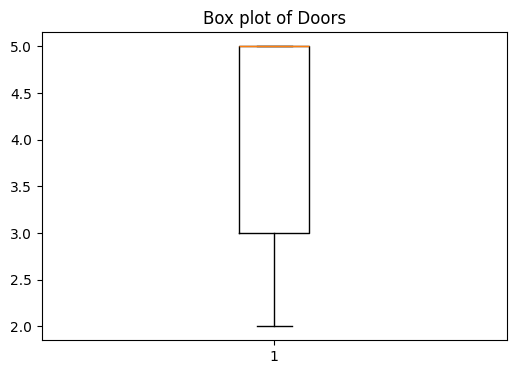

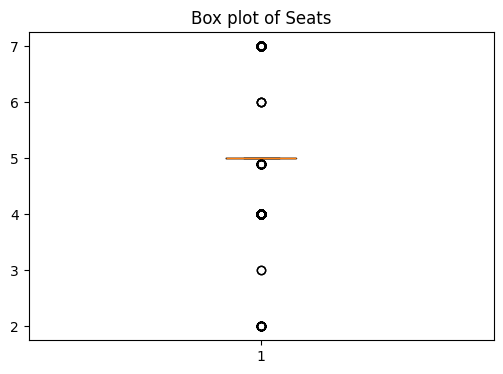

In [26]:
import matplotlib.pyplot as plt

# 각 수치형 열의 박스 플롯을 그림
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(cleaned_df[column].dropna())
    plt.title(f'Box plot of {column}')
    plt.show()


이상치가 다수 발견되어 표준화 기법 사용

In [27]:
from sklearn.preprocessing import StandardScaler

# 수치형 열만 선택하여 스케일링 적용(표준화화)
numeric_columns = cleaned_df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
cleaned_df[numeric_columns] = scaler.fit_transform(cleaned_df[numeric_columns])

# 스케일링 결과 확인
cleaned_df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_11136\1697141806.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[numeric_columns] = scaler.fit_transform(cleaned_df[numeric_columns])


,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,SKODA FABIA,0.248596,-0.283367,0.816908,0.158378,Diesel,Hatchback,6,Manual,0.689759,0.173482,5,Unknown,NaN
1,VAUXHALL CORSA,-0.957413,0.183295,-0.757489,0.981365,Petrol,Hatchback,4,Manual,-1.343156,0.173482,3,Full,NaN
2,HYUNDAI I30,-1.079241,1.411464,-0.167090,0.000000,Petrol,Hatchback,6,Manual,0.689759,0.173482,4,Unknown,NaN
3,MINI HATCH,-0.756598,0.389939,-0.363890,1.804351,Petrol,Hatchback,6,Manual,-1.343156,-1.567058,3,Full,NaN
4,VAUXHALL CORSA,-1.067862,0.092352,0.226509,0.000000,Diesel,Hatchback,5,Manual,0.689759,0.173482,4,Unknown,NaN


In [28]:
from sklearn.decomposition import PCA

# 수치형 변수의 결측치를 각 열의 평균값으로 채움
cleaned_df[numeric_columns] = cleaned_df[numeric_columns].fillna(cleaned_df[numeric_columns].mean())

# PCA 적용 (정보를 70% 이상 유지하는 최소한의 주성분 개수를 자동으로 선택)
pca = PCA(n_components=0.7)
principal_components = pca.fit_transform(cleaned_df[numeric_columns])

# 변환된 주성분 데이터를 DataFrame으로 변환
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# 주성분의 설명력 비율 확인 - 합계 70% 이상
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio


C:\Users\user\AppData\Local\Temp\ipykernel_11136\3892967094.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[numeric_columns] = cleaned_df[numeric_columns].fillna(cleaned_df[numeric_columns].mean())


array([0.40379075, 0.24868765, 0.12285923])

In [29]:
# 국가별 브랜드 개수 계산
brand_count_by_country = brand_df['country'].value_counts()

# 결과 출력
brand_count_by_country


country
Japan             11
United Kingdom     8
Germany            6
United States      5
South Korea        4
France             4
Italy              4
Sweden             2
Czech Republic     1
Spain              1
Malaysia           1
Romania            1
Name: count, dtype: int64

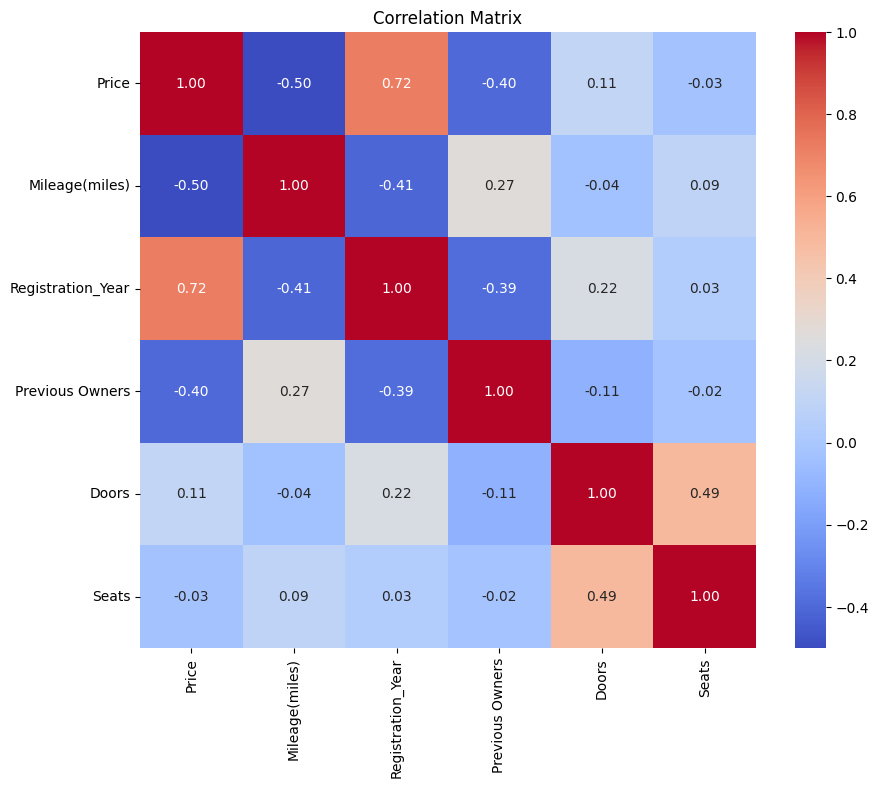

In [32]:
# 수치형 열만 선택하여 상관관계 계산
numeric_columns = cleaned_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = cleaned_df[numeric_columns].corr()

# 상관관계 히트맵 시각화(색이 진할수록 높은 상관관계)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()
